In [1]:
import numpy as np
import pandas as pd
import xlrd

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

readRDS = robjects.r['readRDS']

In [2]:
scc = readRDS('Source_Classification_Code.rds')
scc = pandas2ri.ri2py(scc)
writer = pd.ExcelWriter('scc.xlsx')
scc.to_excel(writer,'Sheet1')
writer.save()

In [3]:
nei = readRDS('summarySCC_PM25.rds')
nei = pandas2ri.ri2py(nei)

In [4]:
scc.head(n=2)

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
1,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NaN,-2147483648,,,
2,10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Trave...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NaN,-2147483648,,,


In [5]:
nei.head(n=3)

,fips,SCC,Pollutant,Emissions,type,year
4,09001,10100401,PM25-PRI,15.714,POINT,1999
8,09001,10100404,PM25-PRI,234.178,POINT,1999
12,09001,10100501,PM25-PRI,0.128,POINT,1999


### 1. Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Using the any plotting system, make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.

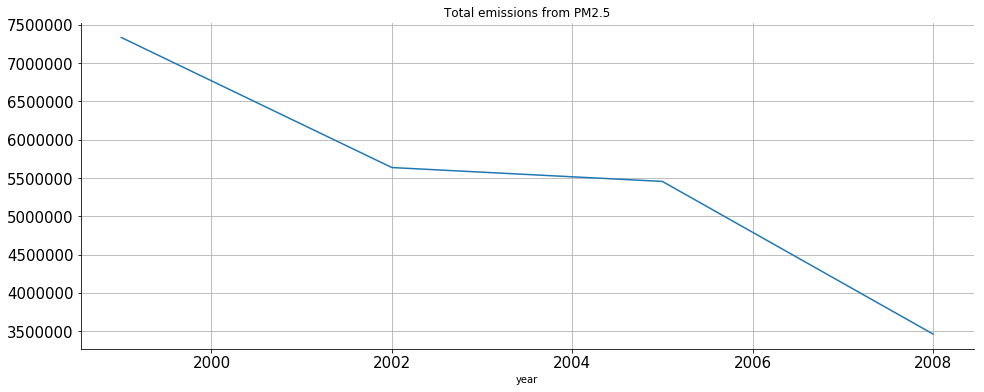

In [31]:
fig = nei.groupby('year')['Emissions'].sum().plot(figsize=(16, 6), title='Total emissions from PM2.5', fontsize=15)
fig.grid()
sb.despine()

pl = fig.get_figure()
pl.savefig("total_emissions_usa.png")

### 2. Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (fips == "24510") from 1999 to 2008? Use the any  plotting system to make a plot answering this question.

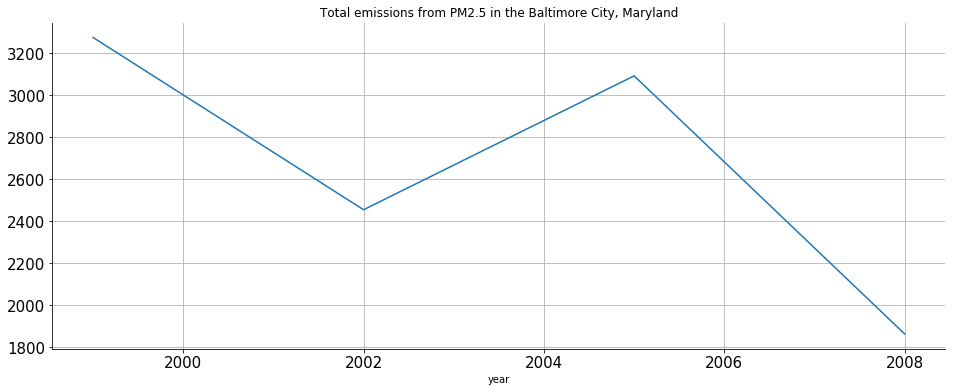

In [32]:
second = nei.loc[nei['fips'] == "24510"]

fig = second.groupby('year')['Emissions'].sum().plot(figsize=(16, 6), title='Total emissions from PM2.5 in the Baltimore City, Maryland', fontsize=15)
fig.grid()
sb.despine()

pl = fig.get_figure()
pl.savefig("total_emissions_baltimore.png")

### 3. Of the four types of sources indicated by the type (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for Baltimore City? Which have seen increases in emissions from 1999–2008? Use the any  plotting system to make a plot answer this question.

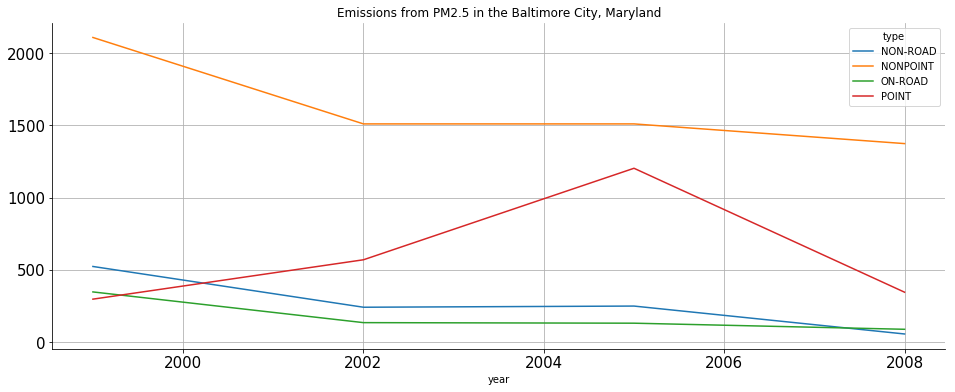

In [33]:
third = second.groupby(['type', 'year'], as_index=False).agg({"Emissions": "sum"})
fig = third.pivot(index='year', columns='type', values='Emissions').plot(figsize=(16, 6), title='Emissions from PM2.5 in the Baltimore City, Maryland', fontsize=15)
fig.grid()
sb.despine()

pl = fig.get_figure()
pl.savefig("total_emissions_baltimore_type.png")

### 4. Across the United States, how have emissions from coal combustion-related sources changed from 1999 –2008?

In [9]:
scc_coal = scc[scc['EI.Sector'].str.contains('Coal')]
forth = scc_coal.merge(nei, how='left', on='SCC')

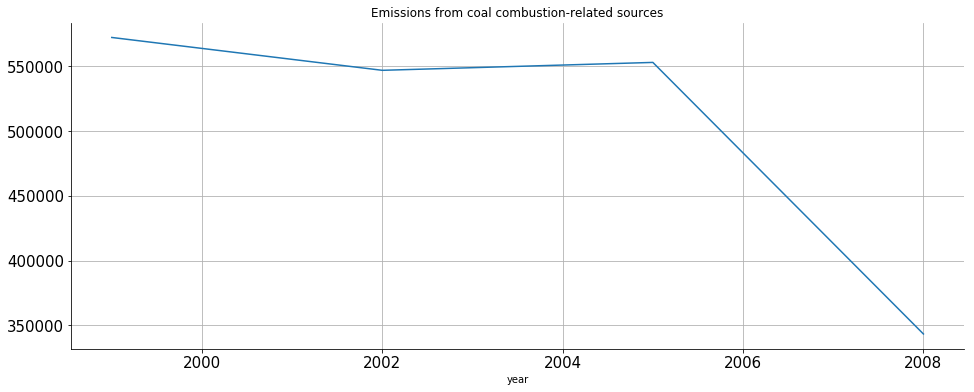

In [34]:
fig = forth.groupby('year')['Emissions'].sum().plot(figsize=(16, 6), title='Emissions from coal combustion-related sources', fontsize=15)
fig.grid()
sb.despine()

pl = fig.get_figure()
pl.savefig("coal_emissions_usa.png")

### 5. How have emissions from motor vehicle sources changed from 1999–2008 in Baltimore City?

In [15]:
scc_vehicle = scc[scc['EI.Sector'].str.contains('Vehicles')]
fifth = scc_vehicle.merge(second, how='left', on='SCC')
bc_veh = fifth.groupby('year')['Emissions'].sum()

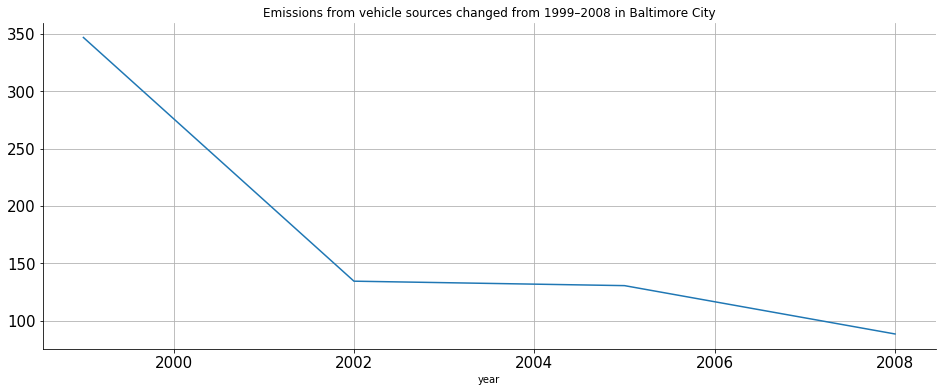

In [36]:
fig = bc_veh.plot(figsize=(16, 6), title='Emissions from vehicle sources changed from 1999–2008 in Baltimore City', fontsize=15)
fig.grid()
sb.despine()

pl = fig.get_figure()
pl.savefig("vehicle_emissions_baltimore.png")

### 6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == "06037"). Which city has seen greater changes over time in motor vehicle emissions

In [17]:
la = nei.loc[nei['fips'] == "06037"]
sixth = scc_vehicle.merge(la, how='left', on='SCC')
la_veh = sixth.groupby('year')['Emissions'].sum()

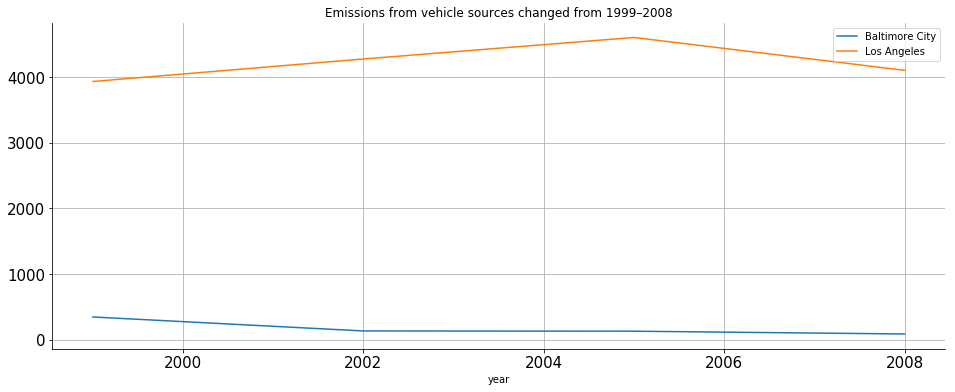

In [37]:
fig = bc_veh.plot(figsize=(16, 6), title='Emissions from vehicle sources changed from 1999–2008', label="Baltimore City", fontsize=15)
la_veh.plot(ax=fig, label="Los Angeles")
fig.legend()
fig.grid()
sb.despine()

pl = fig.get_figure()
pl.savefig("vehicle_emissions_la_bc.png")